# Análise de Dados de Filmes Exibidos no Brasil de 2009 a 2017
Com base nos dados da Ancine (http://oca.ancine.gov.br) vamos analisar os filmes exibidos no Brasil.

Arquivo -> 2120_0.xlsx

In [1]:
# Importando as bibliotecas 
import pandas as pd
# Configurando matplotlib
%matplotlib inline

In [5]:
# Criar o DataFrame com base no arquivo Excel, precisamos pular as 2 primeiras linhas (skiprows)
df = pd.read_excel('2120_0.xlsx', skiprows=2, skipfooter=16)

# Exibir as 5 primeiras linhas 
df.head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2017,#Screamers,Ficção,Estados Unidos,Estrangeiros,2017-11-30 00:00:00,Cineart Filmes,Distribuição Nacional,714,9437.45
1,2017,10 Centavos para o Número da Besta,Documentário,Brasil,Brasileiros,2017-11-28 00:00:00,Ponto de Equilíbrio,Distribuição Nacional,7,63.00
2,2017,120 batimentos por minuto,Ficção,França,Estrangeiros,2018-01-04 00:00:00,Imovision,Distribuição Nacional,262,3791.63
3,2017,13 Minutos,Ficção,Alemanha,Estrangeiros,2016-11-03 00:00:00,Alphaville Filmes,Distribuição Nacional,620,6463.50
4,2017,150 Miligramas,Ficção,França,Estrangeiros,2017-08-31 00:00:00,Califórnia,Distribuição Nacional,771,10508.71


In [6]:
# Exibir as 5 últimas linhas 
df.tail()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5686,2009,X-Men Origens: Wolverine,Ficção,Estados Unidos,Estrangeiros,2009-05-01 00:00:00,Fox,Distribuição Internacional,3199434,27352313.00
5687,2009,Xuxa em o Mistério de Feiurinha,Ficção,Brasil,Brasileiros,2009-12-25 00:00:00,Playarte,Distribuição Nacional,250109,1766416.65
5688,2009,Xuxa em Sonho de Menina,Ficção,Brasil,Brasileiros,2007-12-21 00:00:00,Warner,Distribuição Internacional,8914,26880.00
5689,2009,Xuxa Gêmeas,Ficção,Brasil,Brasileiros,2006-12-15 00:00:00,Fox,Distribuição Internacional,1671,5013.00
5690,2009,Zico na Rede,Documentário,Brasil,Brasileiros,2009-07-03 00:00:00,Business Telecom,Distribuição Nacional,546,2529.50


In [7]:
# Verificar todos os tipos das colunas
df.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [8]:
# Converter o campo Data de lançamento em Data
df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

TypeError: invalid string coercion to datetime

In [9]:
# Vamos tentar identificar o problema da coluna Data de lançamento
df['Data de lançamento'].value_counts()

Relançamento           175
2012-12-21 00:00:00     33
2015-12-03 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
2015-11-19 00:00:00     25
2015-11-12 00:00:00     25
2016-11-17 00:00:00     23
2013-10-11 00:00:00     23
2013-11-01 00:00:00     23
2013-12-06 00:00:00     23
2011-12-02 00:00:00     21
2014-11-06 00:00:00     21
2011-11-11 00:00:00     21
2013-09-13 00:00:00     21
2009-12-11 00:00:00     20
2011-09-30 00:00:00     19
2016-11-10 00:00:00     19
2014-06-19 00:00:00     19
2011-12-09 00:00:00     19
2013-12-20 00:00:00     19
2015-12-10 00:00:00     18
2012-10-12 00:00:00     18
2016-11-24 00:00:00     18
2013-09-06 00:00:00     18
2016-12-01 00:00:00     18
2015-08-20 00:00:00     18
2015-11-26 00:00:00     18
2011-11-25 00:00:00     18
2014-12-04 00:00:00     18
                      ... 
2018-04-12 00:00:00      1
2004-11-06 00:00:00      1
2008-08-01 00:00:00      1
2018-12-28 00:00:00      1
2009-05-23 00:00:00      1
2008-02-02 00:00:00      1
2

In [10]:
# Exibir alguns filmes que estão com datas = Relançamento
df[df['Data de lançamento'] == 'Relançamento'].head()

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
7,2017,8½,Ficção,"França, Itália",Estrangeiros,Relançamento,F. J. Cines,Distribuição Nacional,29,196.00
11,2017,A bela da tarde,Ficção,"França, Itália",Estrangeiros,Relançamento,Zeta Filmes,Distribuição Nacional,3011,42839.31
36,2017,A História sem Fim,Ficção,"Alemanha, Estados Unidos",Estrangeiros,Relançamento,F. J. Cines,Distribuição Nacional,797,6969.00
53,2017,A primeira noite de um homem,Ficção,Estados Unidos,Estrangeiros,Relançamento,Zeta Filmes,Distribuição Nacional,12,96.00
128,2017,Ballet Bolshoi: A bela adormecida,Vídeomusical,Inglaterra,Estrangeiros,Relançamento,UCI,Distribuição Nacional,1504,41391.00


## Decisão sobre dados incorretos/faltantes/divergentes

In [14]:
df.shape

(5691, 10)

In [13]:
# Descartar os filmes que possui o texto "Relançamento" em "Data de lançamento"
df_novo = df[df['Data de lançamento'] != 'Relançamento'].copy()

In [15]:
# Vamos verificar os tipos das colunas
df_novo.dtypes

Ano de exibição                      int64
Título da obra                      object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [16]:
df_novo.shape

(5516, 10)

In [17]:
# Converter a coluna "Data de lançamento" para datetime
df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

In [18]:
df_novo.dtypes

Ano de exibição                             int64
Título da obra                             object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                  int64
Renda (R$) no ano de exibição             float64
dtype: object

In [19]:
# Quais os anos tiveram mais filmes lançados?
df_novo['Data de lançamento'].dt.year.value_counts()

2013    669
2015    646
2014    619
2016    613
2011    553
2012    539
2009    503
2017    487
2010    475
2008    225
2007     61
2006     49
2005     29
2018     17
2004     10
2002      6
2001      5
2003      4
1999      3
2000      2
1998      1
Name: Data de lançamento, dtype: int64

In [20]:
df_novo['Ano de exibição'].value_counts()

2015    748
2016    727
2017    678
2014    640
2009    583
2013    565
2011    558
2012    510
2010    507
Name: Ano de exibição, dtype: int64

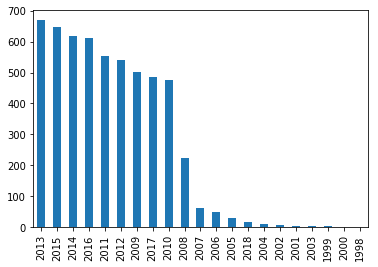

In [21]:
# Vamos plotar um gráfico com os lançamentos por ano
df_novo['Data de lançamento'].dt.year.value_counts().plot.bar()

In [22]:
# Qual filme com maior bilheteria ?
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,146184931.0


In [23]:
df_novo[df_novo['Público no ano de exibição'] == df_novo['Público no ano de exibição'].max()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
1275,2016,Os Dez Mandamentos - O Filme,Ficção,Brasil,Brasileiros,2016-01-28,Downtown/Paris,Distribuição Nacional,11305479,1.168330e+08


In [24]:
# Os 5 filmes com maior bilheteria
df_novo.nlargest(5, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2249,2015,Vingadores: A Era de Ultron,Ficção,Estados Unidos,Estrangeiros,2015-04-23,Disney,Distribuição Internacional,10129071,1.461849e+08
893,2016,Capitão América: Guerra civil,Ficção,Estados Unidos,Estrangeiros,2016-04-28,Disney,Distribuição Internacional,9617572,1.433370e+08
2242,2015,Velozes e Furiosos 7,Ficção,Estados Unidos,Estrangeiros,2015-04-02,Universal,Distribuição Internacional,9857946,1.424659e+08
682,2017,Velozes e Furiosos 8,Ficção,Estados Unidos,Estrangeiros,2017-04-13,Universal,Distribuição Internacional,8505215,1.334237e+08
364,2017,Liga da Justiça,Ficção,Estados Unidos,Estrangeiros,2017-11-15,Warner,Distribuição Internacional,8442364,1.325756e+08


In [25]:
# Qual filme com menor bilheteria ?
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].min()]

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
2277,2014,A Batalha do passinho,Documentário,Brasil,Brasileiros,2013-10-11,Cine Santa Teresa,Distribuição Nacional,355,0.0
2608,2014,Mar negro,Ficção,Brasil,Brasileiros,2014-01-17,Petrini,Distribuição Nacional,0,0.0
2728,2014,O Último Lance do Leilão,Ficção,Brasil,Brasileiros,2014-05-01,Sam Rádio Pictures,Distribuição Nacional,0,0.0
3041,2013,As horas vulgares,Ficção,Brasil,Brasileiros,2013-08-09,Petrini,Distribuição Nacional,0,0.0
3058,2013,Beije-me outra vez,Ficção,Itália,Estrangeiros,2013-05-10,Petrini,Distribuição Nacional,0,0.0
3105,2013,Crazy Horse,Ficção,Estados Unidos,Estrangeiros,2013-06-28,Petrini,Distribuição Nacional,0,0.0
3390,2013,Quase um tango,Ficção,Brasil,Brasileiros,2013-08-16,NGM Produções,Distribuição Nacional,0,0.0
3459,2013,Todos os Dias,Ficção,Reino Unido,Estrangeiros,2014-01-24,Esfera Produções,Distribuição Nacional,0,0.0
3603,2012,Apenas entre Nós,Ficção,"França, Eslovênia, Sérvia, Croácia",Estrangeiros,2015-05-07,Lume,Distribuição Nacional,0,0.0
3627,2012,Ataque ao prédio,Ficção,Reino Unido,Estrangeiros,2012-01-13,Sony,Distribuição Internacional,0,0.0


In [26]:
# Quantos filmes brasileiros e estrangeiros ?
df_novo['Nacionalidade da obra'].value_counts()

Estrangeiros    3902
Brasileiros     1614
Name: Nacionalidade da obra, dtype: int64

In [30]:
df_novo.count??